<div style="text-align: left; background-color:black; font-family: Trebuchet MS; color:#A60505; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: black solid;"> Vehicle Type Recognition </div>

<center>
    <img src='https://www.researchgate.net/publication/330853670/figure/fig2/AS:722606860800000@1549294309255/Selected-samples-of-vehicle-classes-bus-motorcycle-sedan-truck-and-vans.png'>
</center>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="background-color:#B21010;font-family:sans-serif;color:#FFF9ED;font-size:150%;text-align:center;border-radius:9px 9px; padding: 15px; border-style: solid; border-color: black">TABLE OF CONTENTS</div>   
    
* [1. Introduction](#1)
    
* [2. Import Necessaries](#2)
    
* [3. EDA](#3)

    * [3.1. Define data path and dataset name](#3.1)
    * [3.2. Create Dataframe for the dataset](#3.2)
    * [3.3. Display Number of Examples in the dataset](#3.3)
    * [3.4. Display Number of Classes in the dataset](#3.4)
    * [3.5. Display count of images in each class of the dataset](#3.5)
    * [3.6. Visualize Each Class in the dataset](#3.6)
    * [3.7. Check Null values in the dataframe](#3.7)
    * [3.8. Visualize Null values](#3.8)
    
    
* [4. Split dataframe into train, valid, and test](#4)
     
* [5. Create Image Data Generator](#5)

* [6. Visualize Training dataset](#6)

* [7. Model Structure](#7)

    * [7.1. Generic Model Creation](#7.1)
    * [7.2. Define Early Stop](#7.2)
    * [7.3. Train model](#7.3)
    

* [8. Evaluate Model](#8)

    * [8.1. Plot accuarcy and loss curve](#8.1)
    * [8.2. Model Accuarcy](#8.2)
    * [8.3. Get Predictions](#8.3)
    

* [9. Save the Model](#9)

* [10. Load Model and Predict Inputs](#10)

* [11. Compare EfficientNet B0 to B7 Results](#11)

* [12. AUTHOR MESSAGE](#12)



<a id="1"></a>
## <b>1 <span style='color:#B21010'>||</span> Introduction</b>


<div style="border-radius:10px;
            border: black solid;
            adding: 15px;
            background-color:#FBA7A7;
            font-size:120%;
            text-aling: left">
<h3 style:'border:0; border-radius: 15px; color: black'><center> Steps we will go through:</center></h3>

_________________________________________________________________________
    
Imagine a world where machines effortlessly identify cars, trucks, motorcycles, and more, solely through images. That's precisely what we're setting out to achieve. The implications are immense – from urban planning to autonomous driving, our journey into image classification holds transformative power.

Let's dive in and harness the magic of deep learning to crack the code of vehicle type recognition
    
we will walk through this steps:
    
1. Load the data by storing each image path in a list and its corresponding label in another list<br>
2. Transform the lists into dataframe<br>
3. EDA and analyze the data for more insights
4. Split the data into train, test and validation datasets<br>
5. Create Data Generator for Train, Test and validation datasets<br>
Tensorflow Generators are very useful to Generate batches of tensor image data with real-time data augmentation.<br>
6. Load the pretrained model, add some layers on top of its base layer and compile it<br>
We will be using EffiecentNet, of course you can use any pretrained model you want and tune its architecture and parameters!<br>
7. Evaluate the model by plotting acc and loss curves, plot confussion matrix and print classification report<br>
8. Save The model to use it in production
9. Load The model and predict inputs
    
after that I will compare the EfficientNet B0 - B7 results

<a id="2"></a>
## <b>2 <span style='color:#B21010'>||</span> Import Necessaries</b>

In [22]:
import os
import itertools

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


<a id="3"></a>
## <b>3 <span style='color:#B21010'>||</span> EDA</b>

<a id="3.1"></a>
### <b>3.1 <span style='color:#B21010'>||</span> Define data path and dataset name</b>

In [2]:
data_dir = '/kaggle/input/vehicle-type-recognition/Dataset'
ds_name = 'Vechiles'

<a id="3.2"></a>
### <b>3.2 <span style='color:#B21010'>||</span> Create Dataframe for the dataset</b>

In [3]:
# Generate data paths with labels

def generate_data_paths(data_dir):
    
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)
            
    return filepaths, labels


filepaths, labels = generate_data_paths(data_dir)

In [4]:
def create_df(filepaths, labels):

    Fseries = pd.Series(filepaths, name= 'filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis= 1)
    return df

df = create_df(filepaths, labels)

In [5]:
df.head()

,filepaths,labels
0,/kaggle/input/vehicle-type-recognition/Dataset...,motorcycle
1,/kaggle/input/vehicle-type-recognition/Dataset...,motorcycle
2,/kaggle/input/vehicle-type-recognition/Dataset...,motorcycle
3,/kaggle/input/vehicle-type-recognition/Dataset...,motorcycle
4,/kaggle/input/vehicle-type-recognition/Dataset...,motorcycle


<a id="3.3"></a>
### <b>3.3 <span style='color:#B21010'>||</span> Display Number of Examples in the dataset</b>

In [6]:
def num_of_examples(df, name='df'):
    print(f"The {name} dataset has {df.shape[0]} images.")
    
num_of_examples(df, ds_name)

The Vechiles dataset has 400 images.


<a id="3.4"></a>
### <b>3.4 <span style='color:#B21010'>||</span> Display Number of Classes in the dataset</b>

In [7]:
def num_of_classes(df, name='df'):
    print(f"The {name} dataset has {len(df['labels'].unique())} classes")
    
num_of_classes(df, ds_name)

The Vechiles dataset has 4 classes


<a id="3.5"></a>
### <b>3.5 <span style='color:#B21010'>||</span> Display count of images in each class of the dataset</b>

In [8]:
def classes_count(df, name='df'):
    
    print(f"The {name} dataset has: ")
    print("="*70)
    print()
    for name in df['labels'].unique():
        num_class = len(df['labels'][df['labels'] == name])
        print(f"Class '{name}' has {num_class} images")
        print('-'*70)
        
classes_count(df, ds_name)

The Vechiles dataset has: 

Class 'motorcycle' has 100 images
----------------------------------------------------------------------
Class 'Bus' has 100 images
----------------------------------------------------------------------
Class 'Truck' has 100 images
----------------------------------------------------------------------
Class 'Car' has 100 images
----------------------------------------------------------------------


<a id="3.6"></a>
### <b>3.6 <span style='color:#B21010'>||</span> Visualize Each Class in the dataset</b>

In [9]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)
    
    
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

cat_summary_with_graph(df,'labels')

<a id="3.7"></a>
### <b>3.7 <span style='color:#B21010'>||</span> Check Null values in the dataframe</b>

In [10]:
def check_null_values(df, name='df'):
    
    num_null_vals = sum(df.isnull().sum().values)
    
    if not num_null_vals:
        print(f"The {name} dataset has no null values")
    
    else:
        print(f"The {name} dataset has {num_null_vals} null values")
        print('-'*70)
        print('Total null values in each column:\n')
        print(df.isnull().sum())
        

check_null_values(df, ds_name)

The Vechiles dataset has no null values


<a id="3.8"></a>
### <b>3.8 <span style='color:#B21010'>||</span> Visualize Null values</b>

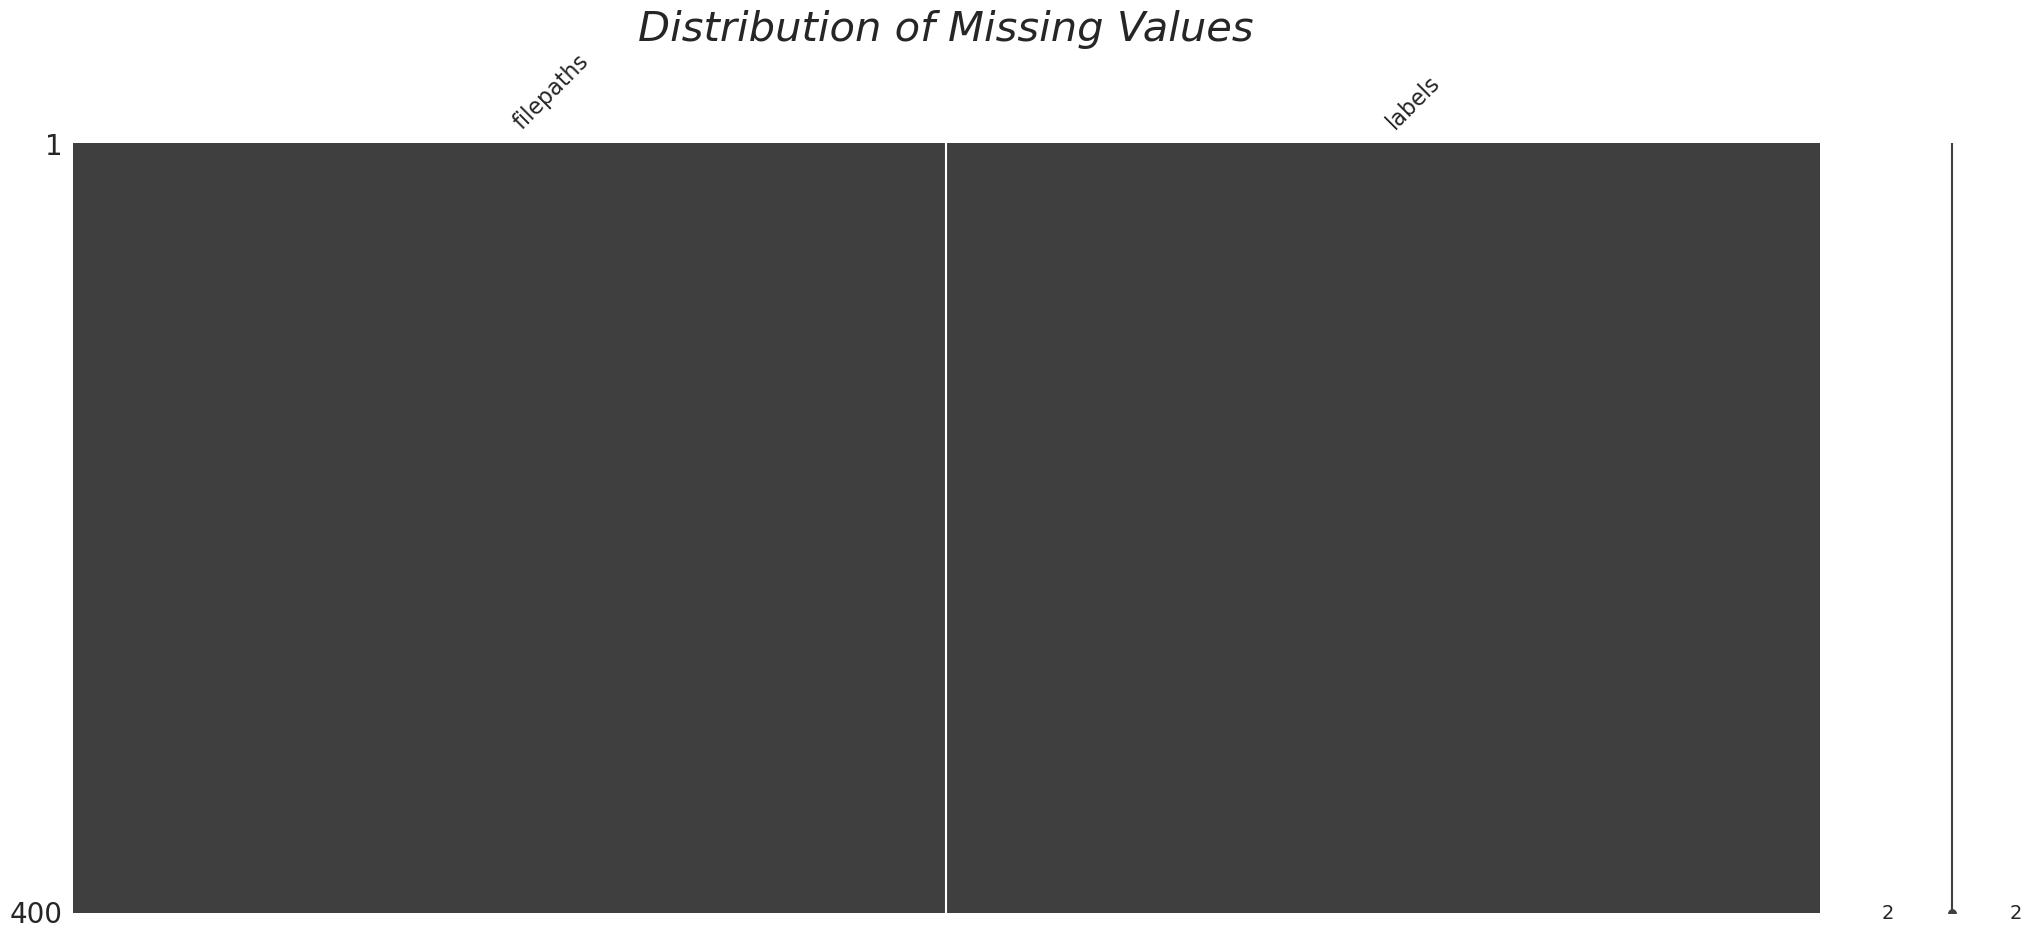

In [11]:
msno.matrix(df)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique');

<a id="4"></a>
## <b>4 <span style='color:#B21010'>||</span>Split dataframe into train, valid, and test</b>

In [12]:
# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.6, shuffle= True, random_state= 123)

In [13]:
num_of_classes(train_df, "Training "+ds_name)
num_of_classes(valid_df, "Validation "+ds_name)
num_of_classes(test_df, "Testing "+ds_name)

The Training Vechiles dataset has 4 classes
The Validation Vechiles dataset has 4 classes
The Testing Vechiles dataset has 4 classes


In [14]:
classes_count(train_df, 'Training '+ds_name)

The Training Vechiles dataset has: 

Class 'Bus' has 82 images
----------------------------------------------------------------------
Class 'Truck' has 74 images
----------------------------------------------------------------------
Class 'motorcycle' has 79 images
----------------------------------------------------------------------
Class 'Car' has 85 images
----------------------------------------------------------------------


In [15]:
classes_count(valid_df, 'Validation '+ds_name)

The Validation Vechiles dataset has: 

Class 'motorcycle' has 11 images
----------------------------------------------------------------------
Class 'Truck' has 21 images
----------------------------------------------------------------------
Class 'Bus' has 8 images
----------------------------------------------------------------------
Class 'Car' has 8 images
----------------------------------------------------------------------


In [16]:
classes_count(test_df, 'Testing '+ds_name)

The Testing Vechiles dataset has: 

Class 'Car' has 7 images
----------------------------------------------------------------------
Class 'Bus' has 10 images
----------------------------------------------------------------------
Class 'motorcycle' has 10 images
----------------------------------------------------------------------
Class 'Truck' has 5 images
----------------------------------------------------------------------


<a id="5"></a>
## <b>5 <span style='color:#B21010'>||</span>Create Image Data Generator</b>

In [17]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           brightness_range=[0.4,0.6],
                           zoom_range=0.3,
                           horizontal_flip=True,
                           vertical_flip=True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           brightness_range=[0.4,0.6],
                           zoom_range=0.3,
                           horizontal_flip=True,
                           vertical_flip=True)

train_gen = tr_gen.flow_from_dataframe(train_df, 
                                       x_col= 'filepaths', 
                                       y_col= 'labels', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= 'rgb', 
                                       shuffle= True, 
                                       batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, 
                                       x_col= 'filepaths', 
                                       y_col= 'labels', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= 'rgb', 
                                       shuffle= True, 
                                       batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe(test_df, 
                                      x_col= 'filepaths', 
                                      y_col= 'labels', 
                                      target_size= img_size, 
                                      class_mode= 'categorical',
                                      color_mode= 'rgb', 
                                      shuffle= False, 
                                      batch_size= test_batch_size)

Found 320 validated image filenames belonging to 4 classes.
Found 48 validated image filenames belonging to 4 classes.
Found 32 validated image filenames belonging to 4 classes.


<a id="6"></a>
## <b>6 <span style='color:#B21010'>||</span>Visualize Training dataset</b>

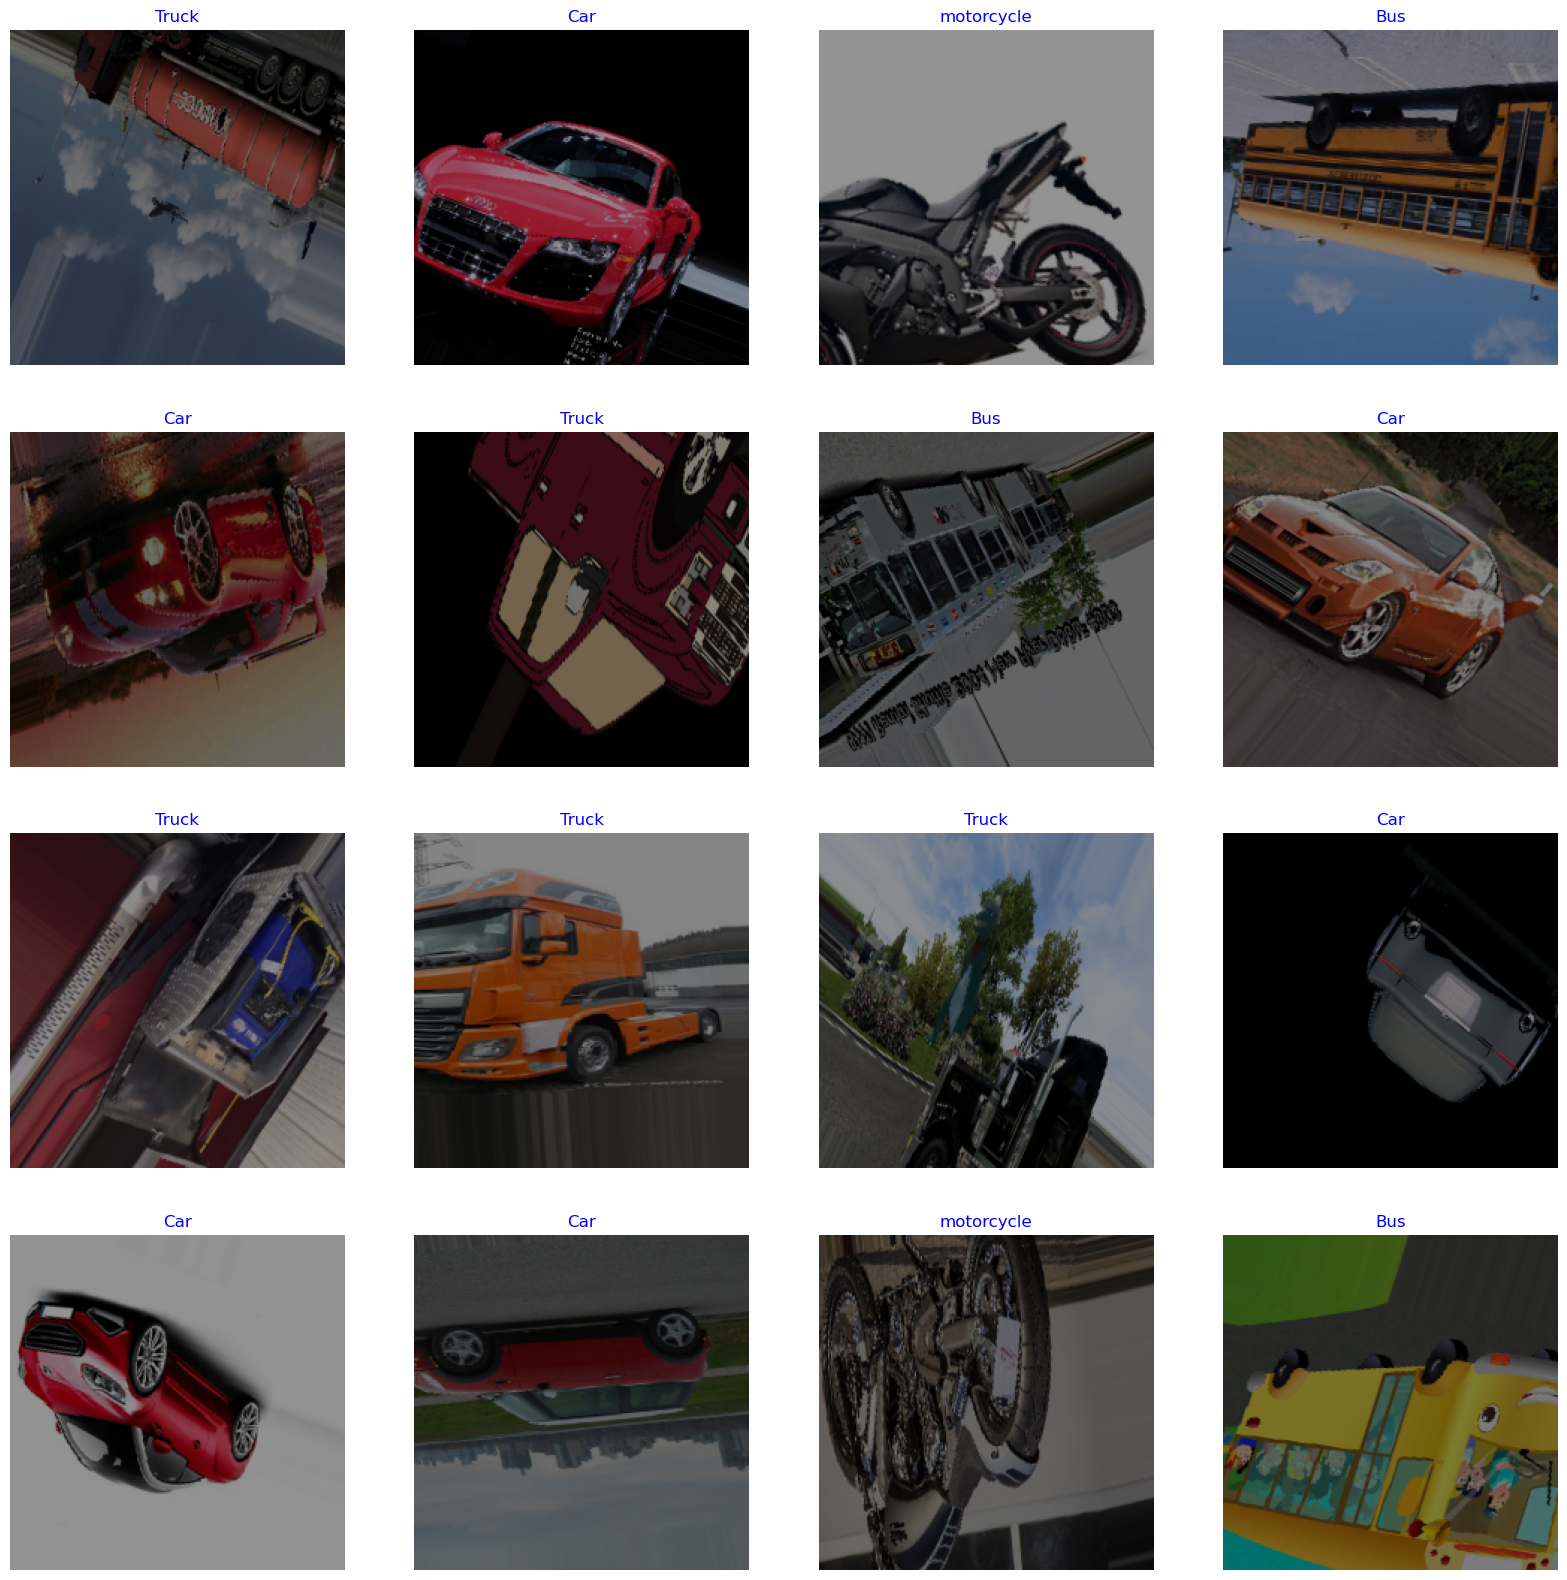

In [18]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
    
plt.show()

<a id="7"></a>
## <b>7 <span style='color:#B21010'>||</span>Model Structure</b>

<a id="7.1"></a>
### <b>7.1 <span style='color:#B21010'>||</span>Generic Model Creation</b>

In [2]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB7(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
base_model.trainable = False

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(128, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

NameError: name 'train_gen' is not defined

<a id="7.2"></a>
### <b>7.2 <span style='color:#B21010'>||</span>Define Early Stop</b>

In [24]:
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=5, 
                               restore_best_weights=True,
                               mode='max',
                              )

def step_decay(epoch):
    
     initial_lrate = 0.1
     drop = 0.5
     epochs_drop = 10.0
     lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
     return lrate

lr_scheduler = LearningRateScheduler(step_decay)

<a id="7.3"></a>
### <b>7.3 <span style='color:#B21010'>||</span>Train Model</b>

In [25]:
batch_size = 16   # set batch size for training
epochs = 50   # number of all epochs in training

history = model.fit(x=train_gen,
                    epochs= epochs,
                    verbose= 1,
                    validation_data= valid_gen, 
                    validation_steps= None,
                    shuffle= False,
                    batch_size= batch_size)

Epoch 1/50


2023-08-28 20:17:18.248140: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/efficientnetb7/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


20/20 [==============================] - 47s 1s/step - loss: 5.4206 - accuracy: 0.6313 - val_loss: 6.0834 - val_accuracy: 0.6458
Epoch 2/50
20/20 [==============================] - 15s 745ms/step - loss: 4.7226 - accuracy: 0.8219 - val_loss: 4.8942 - val_accuracy: 0.8333
Epoch 3/50
20/20 [==============================] - 14s 717ms/step - loss: 4.5564 - accuracy: 0.8562 - val_loss: 4.6845 - val_accuracy: 0.8542
Epoch 4/50
20/20 [==============================] - 15s 734ms/step - loss: 4.3097 - accuracy: 0.8938 - val_loss: 4.3488 - val_accuracy: 0.8542
Epoch 5/50
20/20 [==============================] - 14s 726ms/step - loss: 4.1978 - accuracy: 0.8813 - val_loss: 4.2083 - val_accuracy: 0.8333
Epoch 6/50
20/20 [==============================] - 15s 762ms/step - loss: 4.1176 - accuracy: 0.8594 - val_loss: 4.1261 - val_accuracy: 0.8750
Epoch 7/50
20/20 [==============================] - 14s 694ms/step - loss: 3.9314 - accuracy: 0.8906 - val_loss: 4.0338 - val_accuracy: 0.8542
Epoch 8/50
20

<a id="8"></a>
## <b>8 <span style='color:#B21010'>||</span>Evaluate Model</b>

<a id="8.1"></a>
### <b>8.1 <span style='color:#B21010'>||</span>Plot accuarcy and loss curve </b>

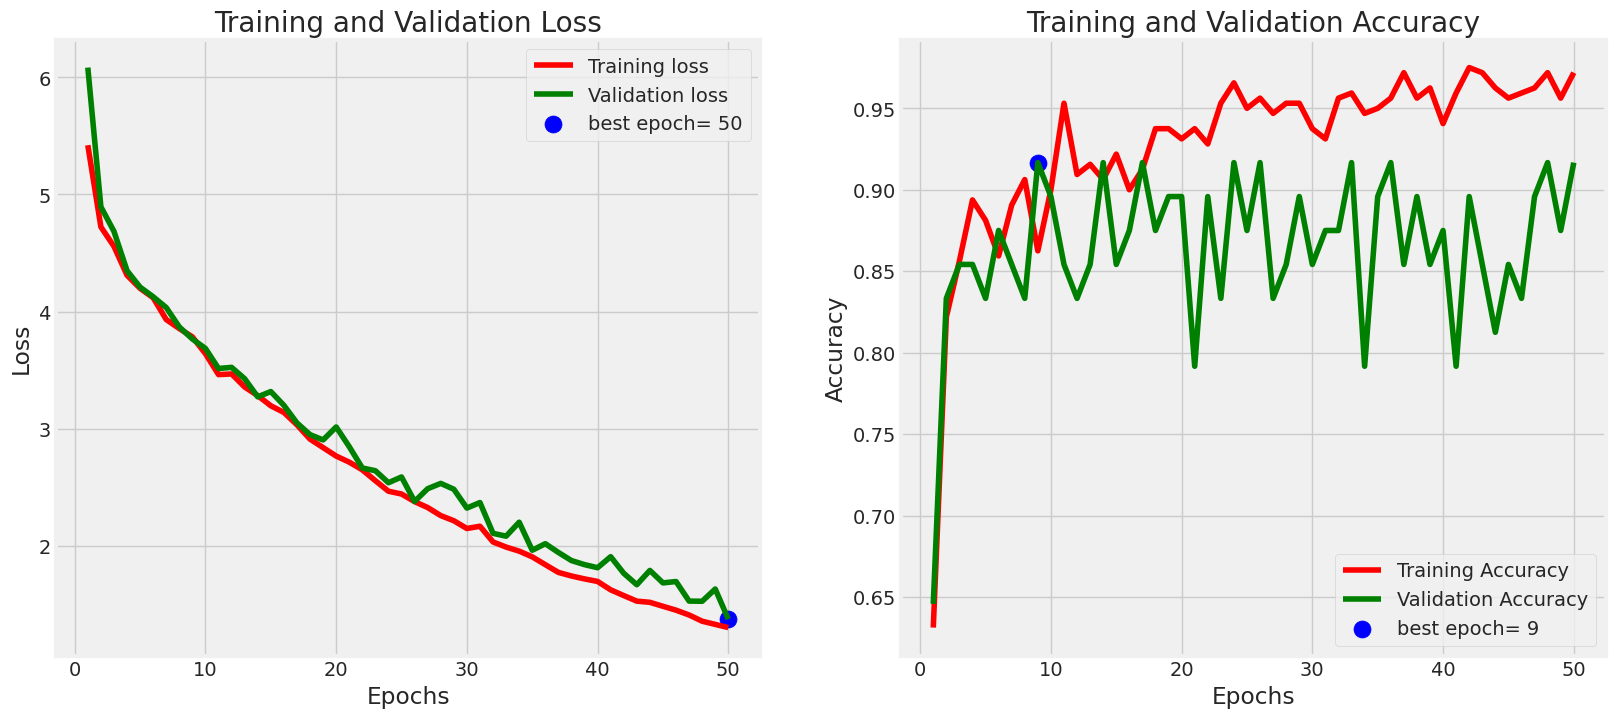

In [26]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

<a id="8.2"></a>
### <b>8.2 <span style='color:#B21010'>||</span>Model Accuarcy</b>

In [27]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1/1 [==============================] - 3s 3s/step - loss: 1.4213 - accuracy: 0.9062
Train Loss:  1.2488224506378174
Train Accuracy:  1.0
--------------------
Validation Loss:  1.2331610918045044
Validation Accuracy:  1.0
--------------------
Test Loss:  1.4213345050811768
Test Accuracy:  0.90625


<a id="8.3"></a>
### <b>8.3 <span style='color:#B21010'>||</span>Get Prediction</b>

In [28]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

<a id="8.4"></a>
### <b>8.4 <span style='color:#B21010'>||</span>Confussion Matrix</b>

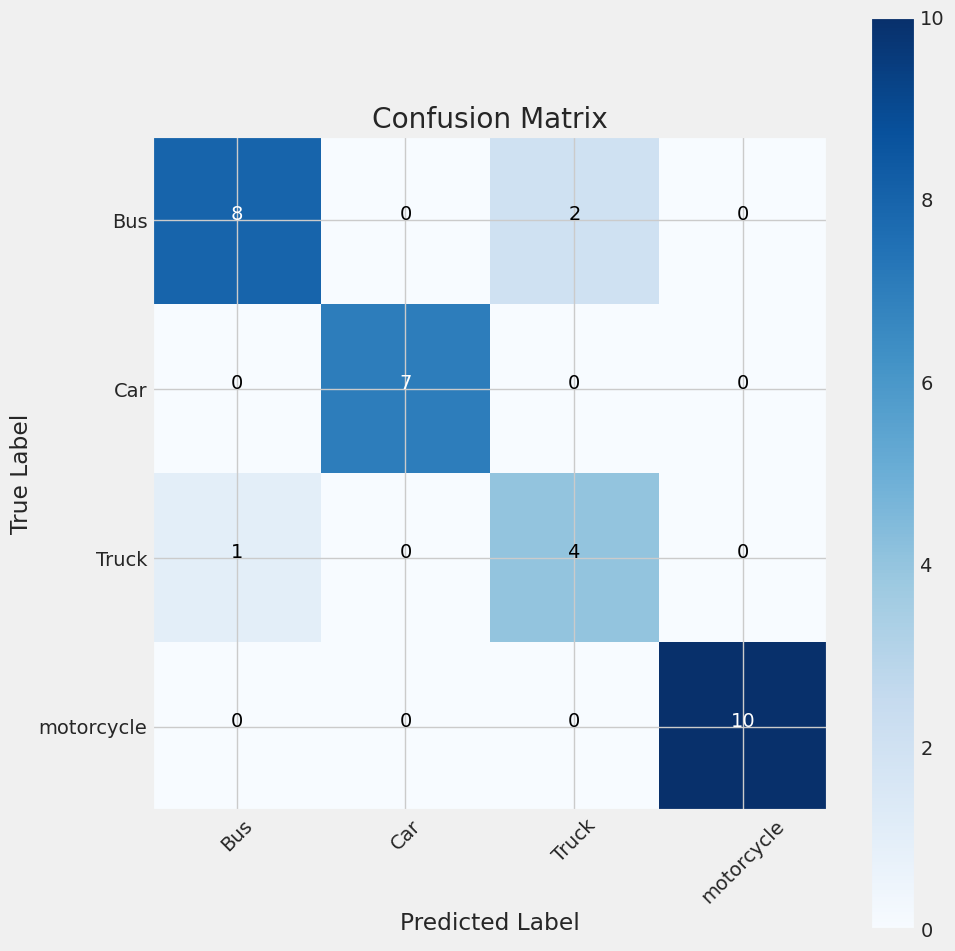

In [29]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

<a id="8.5"></a>
### <b>8.5 <span style='color:#B21010'>||</span>Classification Report</b>

In [30]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

         Bus       0.89      0.80      0.84        10
         Car       1.00      1.00      1.00         7
       Truck       0.67      0.80      0.73         5
  motorcycle       1.00      1.00      1.00        10

    accuracy                           0.91        32
   macro avg       0.89      0.90      0.89        32
weighted avg       0.91      0.91      0.91        32



<a id="9"></a>
## <b>9 <span style='color:#B21010'>||</span>Save the Model</b>

In [31]:
model.save_weights('my_model_weights.h5')

<a id="10"></a>
## <b>10 <span style='color:#B21010'>||</span>Load the model and Predict the Inputs</b>

In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_and_display(image_path, model, class_labels):
    
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    
    predicted_class_label = class_labels[predicted_class_index]
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Vehicle: {predicted_class_label}")
    plt.show()

# Load your trained model
model.load_weights('/my_model_weights.h5')

# Define your class labels (e.g., ['car', 'truck', ...])
class_labels = ['Bus', 'Car', 'Truck', 'Motorcycle']

# Replace 'path_to_test_image' with the path to the image you want to test
image_path_to_test = '/10.jpeg'
predict_and_display(image_path_to_test, model, class_labels)


NameError: name 'model' is not defined

1/1 [==============================] - 0s 44ms/step


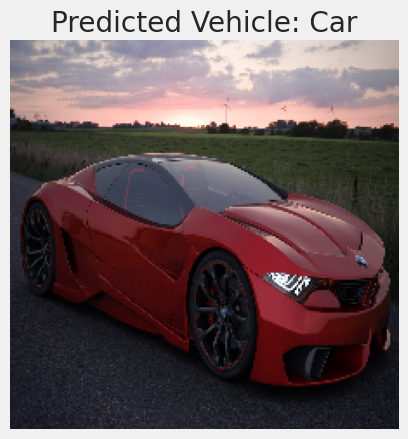

In [33]:
image_path_to_test = '/kaggle/input/vehicle-type-recognition/Dataset/Car/Image_21.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 46ms/step


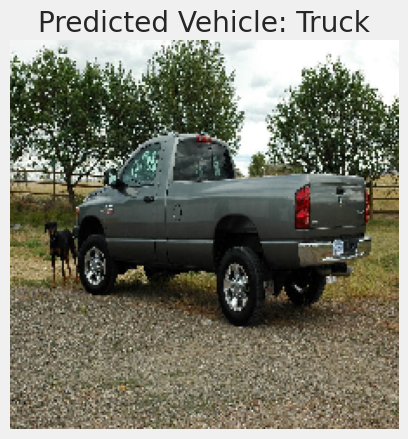

In [34]:
image_path_to_test = '/kaggle/input/vehicle-type-recognition/Dataset/Truck/Image_13.JPG'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 104ms/step


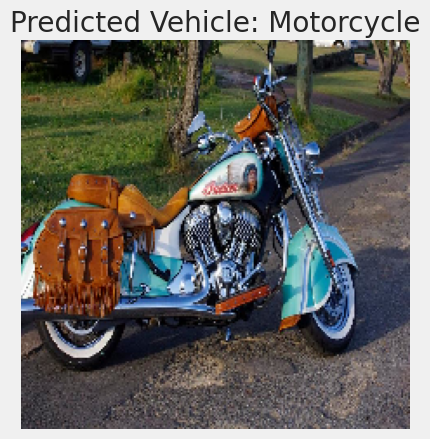

In [35]:
image_path_to_test = '/kaggle/input/vehicle-type-recognition/Dataset/motorcycle/Image_29.jpeg'
predict_and_display(image_path_to_test, model, class_labels)

<a id="11"></a>
## <b>11 <span style='color:#B21010'>||</span>Compare EfficientNet B0 to B7 Results</b>

In [36]:
# List of EfficientNet models
effnet_models = [EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7]
epochs = 30   # number of all epochs in training

# Loop through each model and train/evaluate
for i, effnet_model in enumerate(effnet_models):
    print(f"Training and evaluating EfficientNet B{i}...")

    base_model = effnet_model(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
    base_model.trainable = False

    model = Sequential([
        base_model,
        BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
        Dense(128, kernel_regularizer=tf.keras.regularizers.l2(l=0.016), 
              activity_regularizer=tf.keras.regularizers.l1(0.006),
              bias_regularizer=tf.keras.regularizers.l1(0.006), activation='relu'),
        Dropout(rate=0.45, seed=123),
        Dense(class_count, activation='softmax')
    ])

    model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, mode='max')

    history = model.fit(x=train_gen,
                        epochs=epochs,
                        verbose=0,
                        validation_data=valid_gen,
                        validation_steps=None,
                        shuffle=False,
                        callbacks=[early_stopping])
    
    print(f"EfficientNet B{i} training completed.")

    # Evaluate the model on the test data
    test_results = model.evaluate(test_gen, verbose=0)
    print(f"Test loss for EfficientNet B{i}: {test_results[0]}")
    print(f"Test accuracy for EfficientNet B{i}: {test_results[1]}")

    # Make predictions on the test data
    y_pred = model.predict(test_gen)
    y_pred_labels = y_pred.argmax(axis=1)
    y_true_labels = test_gen.classes

    # Generate classification report
    report = classification_report(y_true_labels, y_pred_labels, target_names=train_gen.class_indices.keys())
    print(report)
    print("-"*70)


Training and evaluating EfficientNet B0...
16705208/16705208 [==============================] - 0s 0us/step


2023-08-28 20:33:03.513615: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


EfficientNet B0 training completed.
Test loss for EfficientNet B0: 3.042736530303955
Test accuracy for EfficientNet B0: 0.96875
1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

         Bus       0.89      0.80      0.84        10
         Car       0.86      0.86      0.86         7
       Truck       0.83      1.00      0.91         5
  motorcycle       1.00      1.00      1.00        10

    accuracy                           0.91        32
   macro avg       0.89      0.91      0.90        32
weighted avg       0.91      0.91      0.91        32

----------------------------------------------------------------------
Training and evaluating EfficientNet B1...
27018416/27018416 [==============================] - 0s 0us/step


2023-08-28 20:38:07.211587: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/efficientnetb1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


EfficientNet B1 training completed.
Test loss for EfficientNet B1: 4.033090591430664
Test accuracy for EfficientNet B1: 0.90625
1/1 [==============================] - 3s 3s/step
              precision    recall  f1-score   support

         Bus       1.00      0.80      0.89        10
         Car       0.86      0.86      0.86         7
       Truck       0.71      1.00      0.83         5
  motorcycle       1.00      1.00      1.00        10

    accuracy                           0.91        32
   macro avg       0.89      0.91      0.89        32
weighted avg       0.92      0.91      0.91        32

----------------------------------------------------------------------
Training and evaluating EfficientNet B2...
31790344/31790344 [==============================] - 0s 0us/step


2023-08-28 20:41:31.121787: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/efficientnetb2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


EfficientNet B2 training completed.
Test loss for EfficientNet B2: 4.03909969329834
Test accuracy for EfficientNet B2: 0.78125
1/1 [==============================] - 3s 3s/step
              precision    recall  f1-score   support

         Bus       0.88      0.70      0.78        10
         Car       1.00      0.71      0.83         7
       Truck       0.56      1.00      0.71         5
  motorcycle       1.00      1.00      1.00        10

    accuracy                           0.84        32
   macro avg       0.86      0.85      0.83        32
weighted avg       0.89      0.84      0.85        32

----------------------------------------------------------------------
Training and evaluating EfficientNet B3...
43941136/43941136 [==============================] - 0s 0us/step


2023-08-28 20:45:20.334507: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


EfficientNet B3 training completed.
Test loss for EfficientNet B3: 4.922965049743652
Test accuracy for EfficientNet B3: 0.78125
1/1 [==============================] - 3s 3s/step
              precision    recall  f1-score   support

         Bus       1.00      0.90      0.95        10
         Car       1.00      1.00      1.00         7
       Truck       0.83      1.00      0.91         5
  motorcycle       1.00      1.00      1.00        10

    accuracy                           0.97        32
   macro avg       0.96      0.97      0.96        32
weighted avg       0.97      0.97      0.97        32

----------------------------------------------------------------------
Training and evaluating EfficientNet B4...
71686520/71686520 [==============================] - 0s 0us/step


2023-08-28 20:47:45.068246: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/efficientnetb4/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


EfficientNet B4 training completed.
Test loss for EfficientNet B4: 3.9029152393341064
Test accuracy for EfficientNet B4: 0.96875
1/1 [==============================] - 4s 4s/step
              precision    recall  f1-score   support

         Bus       1.00      0.80      0.89        10
         Car       1.00      0.71      0.83         7
       Truck       0.62      1.00      0.77         5
  motorcycle       0.91      1.00      0.95        10

    accuracy                           0.88        32
   macro avg       0.88      0.88      0.86        32
weighted avg       0.91      0.88      0.88        32

----------------------------------------------------------------------
Training and evaluating EfficientNet B5...


2023-08-28 20:51:21.812744: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/efficientnetb5/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


EfficientNet B5 training completed.
Test loss for EfficientNet B5: 4.3134260177612305
Test accuracy for EfficientNet B5: 0.90625
1/1 [==============================] - 5s 5s/step
              precision    recall  f1-score   support

         Bus       0.89      0.80      0.84        10
         Car       0.78      1.00      0.88         7
       Truck       0.60      0.60      0.60         5
  motorcycle       1.00      0.90      0.95        10

    accuracy                           0.84        32
   macro avg       0.82      0.82      0.82        32
weighted avg       0.85      0.84      0.84        32

----------------------------------------------------------------------
Training and evaluating EfficientNet B6...
165234480/165234480 [==============================] - 1s 0us/step


2023-08-28 20:54:45.782266: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/efficientnetb6/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


EfficientNet B6 training completed.
Test loss for EfficientNet B6: 4.504757404327393
Test accuracy for EfficientNet B6: 0.84375
1/1 [==============================] - 5s 5s/step
              precision    recall  f1-score   support

         Bus       1.00      0.80      0.89        10
         Car       0.70      1.00      0.82         7
       Truck       0.75      0.60      0.67         5
  motorcycle       1.00      1.00      1.00        10

    accuracy                           0.88        32
   macro avg       0.86      0.85      0.84        32
weighted avg       0.90      0.88      0.87        32

----------------------------------------------------------------------
Training and evaluating EfficientNet B7...


2023-08-28 20:58:01.299565: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_9/efficientnetb7/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


EfficientNet B7 training completed.
Test loss for EfficientNet B7: 3.458329439163208
Test accuracy for EfficientNet B7: 0.9375
1/1 [==============================] - 7s 7s/step
              precision    recall  f1-score   support

         Bus       0.88      0.70      0.78        10
         Car       0.78      1.00      0.88         7
       Truck       0.67      0.80      0.73         5
  motorcycle       1.00      0.90      0.95        10

    accuracy                           0.84        32
   macro avg       0.83      0.85      0.83        32
weighted avg       0.86      0.84      0.84        32

----------------------------------------------------------------------


**Seems like B0 and B4 won the Challange :) <br> I will pick B0 because B4 is doing really poorly on Truck category**

<a id="12"></a>
## <b>12 <span style='color:#B21010'>||</span>Author Message</b>

<p style="background-color:#DEF5B9;font-family:newtimeroman;color:#1D3E06;font-size:130%;text-align:center;border-radius:20px 20px;"> If you liked this Notebook, please do upvote.<br> If you have any questions, feel free to comment!<br> If you have any advice for me I will be grateful to leave it to me in the comments!<br>✨Best Wishes✨</p>